Problem Statement:-
The main purpose of this project was to build a CNN model that would classify if subject has a tumor or not base on MRI scan.
Part -1) Building CNN model 
Part -2) Apply data augmentation to generate new images and then build and analyze same model used in part-1
Part -3) Build a model using transfer learning with the help of State-of-art model
The image data that was used for this problem is Brain MRI Images for Brain Tumor Detection. It conists of MRI scans of two classes:

NO - no tumor, encoded as 0
YES - tumor, encoded as 1

Part -1) Building CNN model 

In [1]:
#Import Libraries
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import os
import pathlib
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model

In [2]:
!rm -r sample_data/

rm: cannot remove 'sample_data/': No such file or directory


In [3]:
!unzip archive.zip

Archive:  archive.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tumor_dataset/no/28 no.jpg  
  inflating: brain

In [4]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder 
encoder = OneHotEncoder()
encoder.fit([[1], [0]]) # 1 for Tumor, 0 for Normal

OneHotEncoder()

In [5]:
#loading dataset
from sklearn.model_selection import train_test_split
import PIL
import numpy as np

file_path="brain_tumor_dataset"
yes_files = os.listdir(file_path + "/yes")
no_files = os.listdir(file_path + "/no")
yes_images = []
yes_lbl = []
no_images = []
no_lbl = []

for i in yes_files:
  image = PIL.Image.open("brain_tumor_dataset/yes/"+i)
  image_resize = image.resize((128,128))
  image_array = np.array(image_resize)
  if(image_array.shape == (128,128,3)):
    yes_images.append(np.array(image_array))
    yes_lbl.append(encoder.transform([[1]]).toarray())
print(len(yes_files))

for i in no_files:
  image = PIL.Image.open("brain_tumor_dataset/no/"+i)
  image_resize = image.resize((128,128))
  image_array = np.array(image_resize)
  if(image_array.shape == (128,128,3)):
    no_images.append(np.array(image_array))
    no_lbl.append(encoder.transform([[0]]).toarray())
print(len(no_files))

images = np.concatenate((np.array(yes_images),np.array(no_images)),axis=0)
labels = np.concatenate((np.array(yes_lbl), np.array(no_lbl)),axis=0)


155
98


In [6]:
print("Shape of images:", images.shape)

Shape of images: (217, 128, 128, 3)


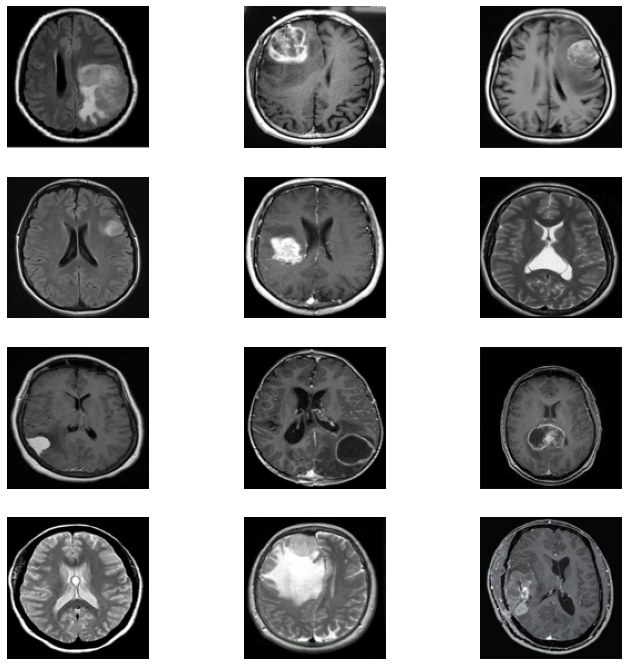

In [7]:
# plot images from the training dataset
plt.figure(figsize=(12, 12))
for i in range(12):
	# define subplot
	plt.subplot(4, 3, 1 + i)
	# turn off axis
	plt.axis('off')
	# plot raw pixel data
	plt.imshow(images[i])
plt.show()

In [8]:
#shape of the labels
labels = labels.reshape(217,2)
print("Shape of images", images.shape)

Shape of images (217, 128, 128, 3)


In [9]:
#splitting dataset into train and test
group2_train = {
    'images' : '',
    'labels' : ''
}


group2_test = {
    'images' : '',
    'labels' : ''
}

group2_train['images'], group2_test['images'], group2_train['labels'], group2_test['labels'] = train_test_split(images, labels, test_size=0.2, shuffle=True, random_state=0,stratify = labels)

In [10]:
#Normalizing the pixel value

group2_train['images'] = group2_train['images']  / 255.0
group2_test['images'] = group2_test['images'] / 255.0

#printing shape
print((group2_train['images'].shape))
print((group2_test['images'].shape))

(173, 128, 128, 3)
(44, 128, 128, 3)


In [11]:
print(group2_train['labels'].shape)

(173, 2)


In [12]:
#Building Model
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128,3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax', metrics='accuracy')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

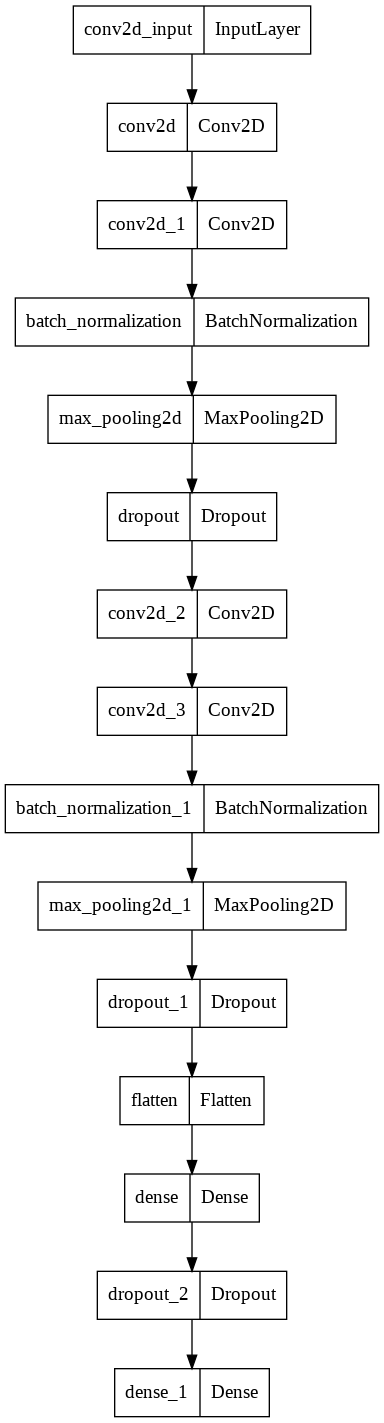

In [13]:
# Generating the model structure
plot_model(model, to_file='model.png')

In [14]:
print(group2_train['images'].shape)
print(group2_train['labels'].shape)
print(group2_test['images'].shape)
print(group2_test['labels'].shape)

(173, 128, 128, 3)
(173, 2)
(44, 128, 128, 3)
(44, 2)


In [15]:
#training model
model_history = model.fit(group2_train['images'], group2_train['labels'],
                  batch_size= 40,
                  verbose = 1,
                  epochs=10,
                  validation_data=(group2_test['images'], group2_test['labels']))

Epoch 1/10
5/5 [==============================] - 14s 291ms/step - loss: 44.5694 - accuracy: 0.6012 - val_loss: 1.0061 - val_accuracy: 0.7500
Epoch 2/10
5/5 [==============================] - 0s 58ms/step - loss: 26.6147 - accuracy: 0.7110 - val_loss: 0.6828 - val_accuracy: 0.7273
Epoch 3/10
5/5 [==============================] - 0s 59ms/step - loss: 10.3581 - accuracy: 0.7341 - val_loss: 0.8718 - val_accuracy: 0.7045
Epoch 4/10
5/5 [==============================] - 0s 62ms/step - loss: 6.0295 - accuracy: 0.7341 - val_loss: 1.0064 - val_accuracy: 0.6818
Epoch 5/10
5/5 [==============================] - 0s 60ms/step - loss: 3.0403 - accuracy: 0.7977 - val_loss: 1.2778 - val_accuracy: 0.6818
Epoch 6/10
5/5 [==============================] - 0s 59ms/step - loss: 1.6050 - accuracy: 0.8613 - val_loss: 1.5899 - val_accuracy: 0.7045
Epoch 7/10
5/5 [==============================] - 0s 59ms/step - loss: 0.9332 - accuracy: 0.8497 - val_loss: 1.7845 - val_accuracy: 0.7045
Epoch 8/10
5/5 [======

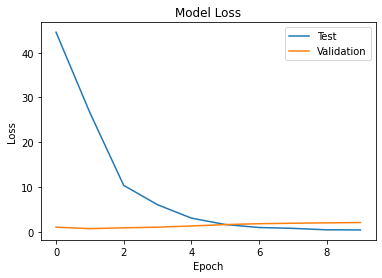

In [16]:
#plotting Training vs validation graph
import matplotlib.pyplot as plt
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [17]:
#Checking Model Prediction
def names(number):
    if number==1:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is No, Its not a tumor


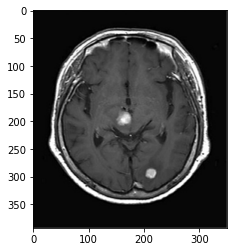

In [18]:
#predicting non tumor images
from matplotlib.pyplot import imshow
from PIL import Image
img = Image.open(r"brain_tumor_dataset/no/N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is A Its a Tumor


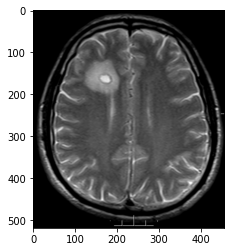

In [19]:
#predicting  tumor images
from matplotlib.pyplot import imshow
img = Image.open(r"brain_tumor_dataset/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

In [20]:
#get the predictions for the test data
cnn_predictions = model.predict(group2_train["images"])
print(cnn_predictions)

[[1.38795134e-04 9.99861240e-01]
 [7.97436595e-01 2.02563405e-01]
 [9.99994516e-01 5.53170457e-06]
 [2.68634160e-11 1.00000000e+00]
 [9.99995112e-01 4.88318665e-06]
 [1.02747081e-05 9.99989748e-01]
 [9.99998927e-01 1.02623596e-06]
 [3.85343355e-07 9.99999642e-01]
 [3.73390669e-08 1.00000000e+00]
 [2.95639529e-06 9.99997020e-01]
 [1.24977482e-03 9.98750210e-01]
 [8.87289003e-04 9.99112666e-01]
 [4.89809178e-02 9.51019049e-01]
 [1.57249525e-01 8.42750430e-01]
 [7.09554122e-04 9.99290466e-01]
 [2.87043719e-07 9.99999762e-01]
 [9.99810159e-01 1.89819286e-04]
 [9.96074200e-01 3.92578356e-03]
 [1.70026535e-08 1.00000000e+00]
 [2.30903581e-01 7.69096375e-01]
 [7.06958234e-01 2.93041736e-01]
 [3.73390669e-08 1.00000000e+00]
 [9.56662297e-01 4.33377363e-02]
 [3.05846402e-06 9.99996901e-01]
 [3.40590402e-02 9.65940952e-01]
 [1.00000000e+00 6.62930333e-09]
 [2.46410670e-10 1.00000000e+00]
 [4.19312937e-06 9.99995828e-01]
 [8.11715052e-02 9.18828487e-01]
 [1.79299975e-13 1.00000000e+00]
 [9.999153

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [22]:
true_label = []
pred_label = []

for i in group2_train['labels']:
  true_label.append(int(np.argmax(i)))

for i in cnn_predictions:
  pred_label.append(int(np.argmax(i)))

In [23]:
#generating confusion matrix
from sklearn.metrics import confusion_matrix

confusing_matrix = confusion_matrix(true_label, pred_label)

print("Confusion Matrix: ")
print(confusing_matrix)

Confusion Matrix: 
[[38 25]
 [11 99]]


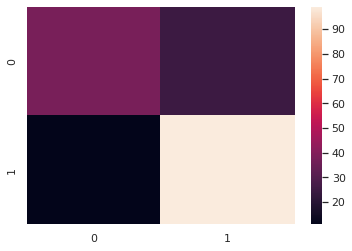

In [24]:
#creating heatmap
import seaborn as sns

sns.set_theme()
ax = sns.heatmap(confusing_matrix)